In [1]:
import pandas as pd
import numpy as np
from pandas import Timestamp
import empyrical

In [2]:
from lumina.empyrical.gentic.pyplot_drawer import plot_his_profit

In [3]:
names = [
        'ultron_1751492470196206','ultron_1751395662731039'
    ]
task_id = '200037'

In [4]:
time_periods = {
    'train_time': (Timestamp('2022-07-25 09:31:00'), Timestamp('2024-05-29 13:22:00')),
    'val_time': (Timestamp('2024-05-29 13:23:00'), Timestamp('2024-12-05 10:15:00')),
    'test_time': (Timestamp('2024-12-05 10:16:00'), Timestamp('2025-03-13 15:00:00'))
}

In [5]:
def create_returns(names, task_id, mode='a_ret', key=None):
    res1 = []
    for name in names:
        if isinstance(key, str):
            temp = "temp/bak/aicso2/{0}/returns/{1}/{2}.feather".format(
                str(task_id), key, name)
        else:
            temp = "temp/bak/aicso2/{0}/returns/{1}.feather".format(
                str(task_id), name)
        cumulative_returns = pd.read_feather(temp).set_index(
            'trade_time')[mode]
        cumulative_returns.name = key + "_" + name
        res1.append(cumulative_returns)
    return pd.concat(res1, axis=1)


In [6]:
#benchmark_returns = create_returns(names=names, task_id=task_id)

In [7]:
benchmark_returns = create_returns(names=['equal_weight','train_fitness_weight','vol_inv_weight',
                                          'lasso','rigde'], task_id=task_id, key='bk')
benchmark_returns.head()

,bk_equal_weight,bk_train_fitness_weight,bk_vol_inv_weight,bk_lasso,bk_rigde
trade_time,,,,,
2022-07-25,-0.002785,-0.003205,0.002592,-0.004064,-0.004064
2022-07-26,-0.001354,-0.001103,0.000682,-0.002015,-0.002015
2022-07-27,0.001820,0.001570,-0.001553,-0.000985,-0.000985
2022-07-28,0.005289,0.005935,0.004652,0.003332,0.003332
2022-07-29,-0.005742,-0.005701,-0.002617,-0.006998,-0.006998


In [8]:
#benchmark_returns1 = create_returns(names=['equal_weight','train_fitness_weight','vol_inv_weight',
#                                          'lasso','rigde'], task_id=task_id, key='bk1')
#benchmark_returns1.head()

In [9]:
tst5_returns = create_returns(names=['equal_weight','train_fitness_weight','vol_inv_weight',
                                          'lasso','rigde'], task_id=task_id, key='tst5')
tst5_returns.head()

,tst5_equal_weight,tst5_train_fitness_weight,tst5_vol_inv_weight,tst5_lasso,tst5_rigde
trade_time,,,,,
2022-07-25,-0.001363,-0.001630,0.001404,-0.002435,-0.002432
2022-07-26,0.000888,0.000310,0.000200,-0.000219,-0.000223
2022-07-27,0.000815,-0.000054,-0.001577,-0.004731,-0.004713
2022-07-28,-0.001349,-0.000938,-0.000539,-0.004138,-0.004137
2022-07-29,-0.003745,-0.004586,-0.003120,-0.008250,-0.008255


In [10]:
tst4_returns = create_returns(names=['equal_weight','train_fitness_weight','vol_inv_weight',
                                          'lasso','rigde'], task_id=task_id, key='tst4')
tst4_returns.head()

,tst4_equal_weight,tst4_train_fitness_weight,tst4_vol_inv_weight,tst4_lasso,tst4_rigde
trade_time,,,,,
2022-07-25,-0.002031,-0.002174,0.001292,-0.003004,-0.003003
2022-07-26,0.000322,-0.000205,-0.000494,-0.000599,-0.000602
2022-07-27,-0.000327,-0.001047,-0.003198,-0.005951,-0.005922
2022-07-28,-0.000501,-0.000236,0.000488,-0.003046,-0.003073
2022-07-29,-0.005769,-0.006239,-0.005020,-0.009410,-0.009410


In [11]:
tst3_returns = create_returns(names=['equal_weight','train_fitness_weight','vol_inv_weight',
                                          'lasso','rigde'], task_id=task_id, key='tst3')
tst3_returns.head()

,tst3_equal_weight,tst3_train_fitness_weight,tst3_vol_inv_weight,tst3_lasso,tst3_rigde
trade_time,,,,,
2022-07-25,-0.002240,-0.002399,0.001602,-0.003247,-0.003268
2022-07-26,-0.003354,-0.003681,-0.002416,-0.004675,-0.004639
2022-07-27,-0.000862,-0.001700,-0.003820,-0.006244,-0.006180
2022-07-28,0.003425,0.003409,0.002557,0.000250,0.000276
2022-07-29,-0.007537,-0.007961,-0.005803,-0.011023,-0.011017


In [12]:
cumulative_returns = pd.concat([benchmark_returns,tst3_returns,tst4_returns,tst5_returns],axis=1)
cumulative_returns.head()

,bk_equal_weight,bk_train_fitness_weight,bk_vol_inv_weight,bk_lasso,bk_rigde,tst3_equal_weight,tst3_train_fitness_weight,tst3_vol_inv_weight,tst3_lasso,tst3_rigde,tst4_equal_weight,tst4_train_fitness_weight,tst4_vol_inv_weight,tst4_lasso,tst4_rigde,tst5_equal_weight,tst5_train_fitness_weight,tst5_vol_inv_weight,tst5_lasso,tst5_rigde
trade_time,,,,,,,,,,,,,,,,,,,,
2022-07-25,-0.002785,-0.003205,0.002592,-0.004064,-0.004064,-0.002240,-0.002399,0.001602,-0.003247,-0.003268,-0.002031,-0.002174,0.001292,-0.003004,-0.003003,-0.001363,-0.001630,0.001404,-0.002435,-0.002432
2022-07-26,-0.001354,-0.001103,0.000682,-0.002015,-0.002015,-0.003354,-0.003681,-0.002416,-0.004675,-0.004639,0.000322,-0.000205,-0.000494,-0.000599,-0.000602,0.000888,0.000310,0.000200,-0.000219,-0.000223
2022-07-27,0.001820,0.001570,-0.001553,-0.000985,-0.000985,-0.000862,-0.001700,-0.003820,-0.006244,-0.006180,-0.000327,-0.001047,-0.003198,-0.005951,-0.005922,0.000815,-0.000054,-0.001577,-0.004731,-0.004713
2022-07-28,0.005289,0.005935,0.004652,0.003332,0.003332,0.003425,0.003409,0.002557,0.000250,0.000276,-0.000501,-0.000236,0.000488,-0.003046,-0.003073,-0.001349,-0.000938,-0.000539,-0.004138,-0.004137
2022-07-29,-0.005742,-0.005701,-0.002617,-0.006998,-0.006998,-0.007537,-0.007961,-0.005803,-0.011023,-0.011017,-0.005769,-0.006239,-0.005020,-0.009410,-0.009410,-0.003745,-0.004586,-0.003120,-0.008250,-0.008255


In [13]:
def create_empyrical(cumulative_returns, types=['all','train','val','test']):
    res = []
    for column in cumulative_returns.columns:
        dt = {'name': column}
        for tp in types:
            if tp == 'all':
                all_fitness = empyrical.sharpe_ratio(returns=cumulative_returns[column],
                                                  period=empyrical.DAILY)
                dt['all_sharpe'] = all_fitness
            if tp == 'train':
                train_fitness = empyrical.sharpe_ratio(returns=cumulative_returns.loc[time_periods['train_time'][0]:time_periods['train_time'][1]][column],
                                               period=empyrical.DAILY)
                dt['train_sharpe'] = train_fitness
            if tp == 'val':
                val_fitness = empyrical.sharpe_ratio(returns=cumulative_returns.loc[time_periods['val_time'][0]:time_periods['val_time'][1]][column],
                                               period=empyrical.DAILY)
                dt['val_sharpe'] = val_fitness
            if tp == 'test':
                test_fitness = empyrical.sharpe_ratio(returns=cumulative_returns.loc[time_periods['test_time'][0]:time_periods['test_time'][1]][column],
                                               period=empyrical.DAILY)
                dt['test_sharpe'] = test_fitness
        res.append(dt)
    return pd.DataFrame(res)

In [ ]:
def create_empyrical(cumulative_returns, types=['all','train','val','test']):
    res = []
    for column in cumulative_returns.columns:
        dt = {'name': column}
        for tp in types:
            if tp == 'all':
                all_fitness = empyrical.sharpe_ratio(returns=cumulative_returns[column],
                                                  period=empyrical.DAILY)
                dt['all_sharpe'] = all_fitness
            if tp == 'train':
                train_fitness = empyrical.sharpe_ratio(returns=cumulative_returns.loc[time_periods['train_time'][0]:time_periods['train_time'][1]][column],
                                               period=empyrical.DAILY)
                dt['train_sharpe'] = train_fitness
            if tp == 'val':
                val_fitness = empyrical.sharpe_ratio(returns=cumulative_returns.loc[time_periods['val_time'][0]:time_periods['val_time'][1]][column],
                                               period=empyrical.DAILY)
                dt['val_sharpe'] = val_fitness
            if tp == 'test':
                test_fitness = empyrical.sharpe_ratio(returns=cumulative_returns.loc[time_periods['test_time'][0]:time_periods['test_time'][1]][column],
                                               period=empyrical.DAILY)
                dt['test_sharpe'] = test_fitness
        res.append(dt)
    return pd.DataFrame(res)

In [14]:
cumulative_returns

,bk_equal_weight,bk_train_fitness_weight,bk_vol_inv_weight,bk_lasso,bk_rigde,tst3_equal_weight,tst3_train_fitness_weight,tst3_vol_inv_weight,tst3_lasso,tst3_rigde,tst4_equal_weight,tst4_train_fitness_weight,tst4_vol_inv_weight,tst4_lasso,tst4_rigde,tst5_equal_weight,tst5_train_fitness_weight,tst5_vol_inv_weight,tst5_lasso,tst5_rigde
trade_time,,,,,,,,,,,,,,,,,,,,
2022-07-25,-0.002785,-0.003205,0.002592,-0.004064,-0.004064,-0.002240,-0.002399,0.001602,-0.003247,-0.003268,-0.002031,-0.002174,0.001292,-0.003004,-0.003003,-0.001363,-0.001630,0.001404,-0.002435,-0.002432
2022-07-26,-0.001354,-0.001103,0.000682,-0.002015,-0.002015,-0.003354,-0.003681,-0.002416,-0.004675,-0.004639,0.000322,-0.000205,-0.000494,-0.000599,-0.000602,0.000888,0.000310,0.000200,-0.000219,-0.000223
2022-07-27,0.001820,0.001570,-0.001553,-0.000985,-0.000985,-0.000862,-0.001700,-0.003820,-0.006244,-0.006180,-0.000327,-0.001047,-0.003198,-0.005951,-0.005922,0.000815,-0.000054,-0.001577,-0.004731,-0.004713
2022-07-28,0.005289,0.005935,0.004652,0.003332,0.003332,0.003425,0.003409,0.002557,0.000250,0.000276,-0.000501,-0.000236,0.000488,-0.003046,-0.003073,-0.001349,-0.000938,-0.000539,-0.004138,-0.004137
2022-07-29,-0.005742,-0.005701,-0.002617,-0.006998,-0.006998,-0.007537,-0.007961,-0.005803,-0.011023,-0.011017,-0.005769,-0.006239,-0.005020,-0.009410,-0.009410,-0.003745,-0.004586,-0.003120,-0.008250,-0.008255
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-03-09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2025-03-10,-0.009024,-0.009492,-0.007734,-0.003782,-0.003782,-0.008321,-0.008469,-0.007265,-0.005340,-0.005397,-0.003792,-0.004232,-0.004885,-0.000379,-0.000393,-0.004261,-0.004543,-0.005173,-0.000931,-0.000932
2025-03-11,0.009389,0.009734,0.002033,0.018158,0.018158,0.004667,0.003725,-0.001534,0.011273,0.011349,0.003263,0.002595,-0.001625,0.010697,0.010912,0.001814,0.001543,-0.002266,0.008920,0.008880


In [15]:
from lumina.empyrical.gentic.pyplot_drawer import plot_his_profit

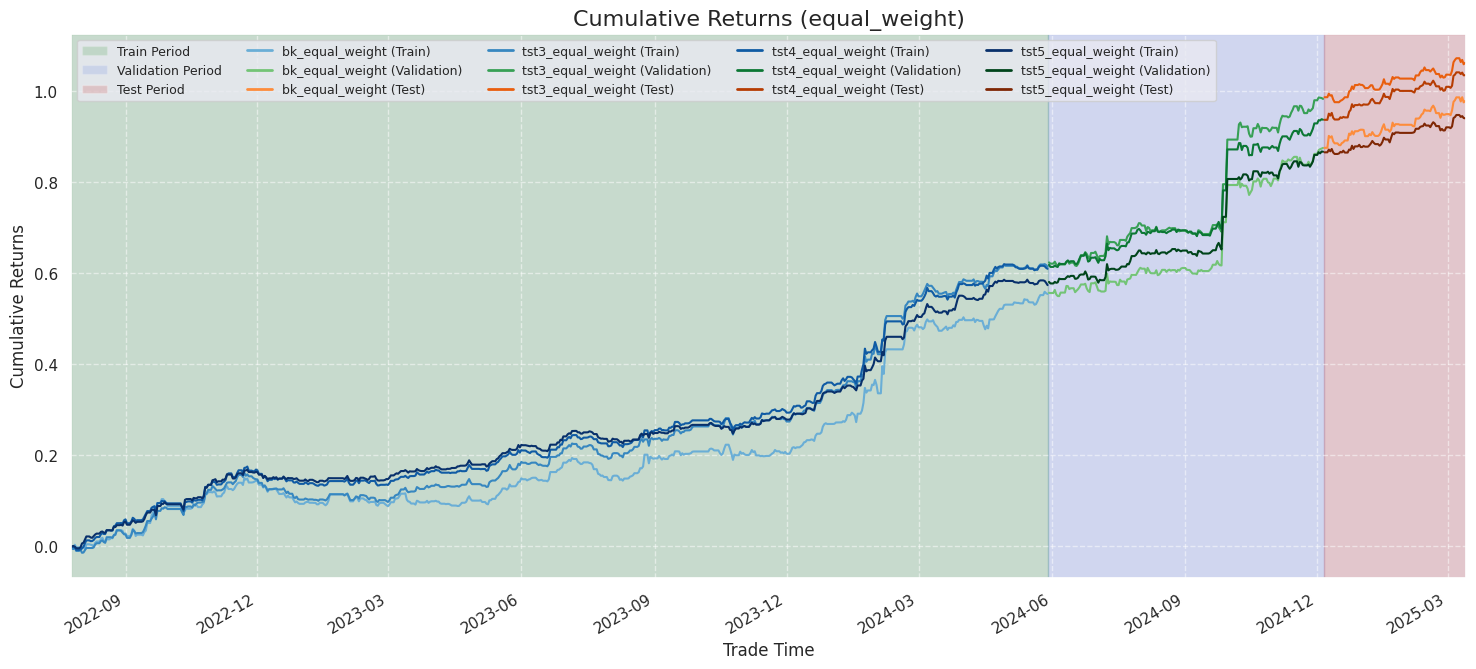

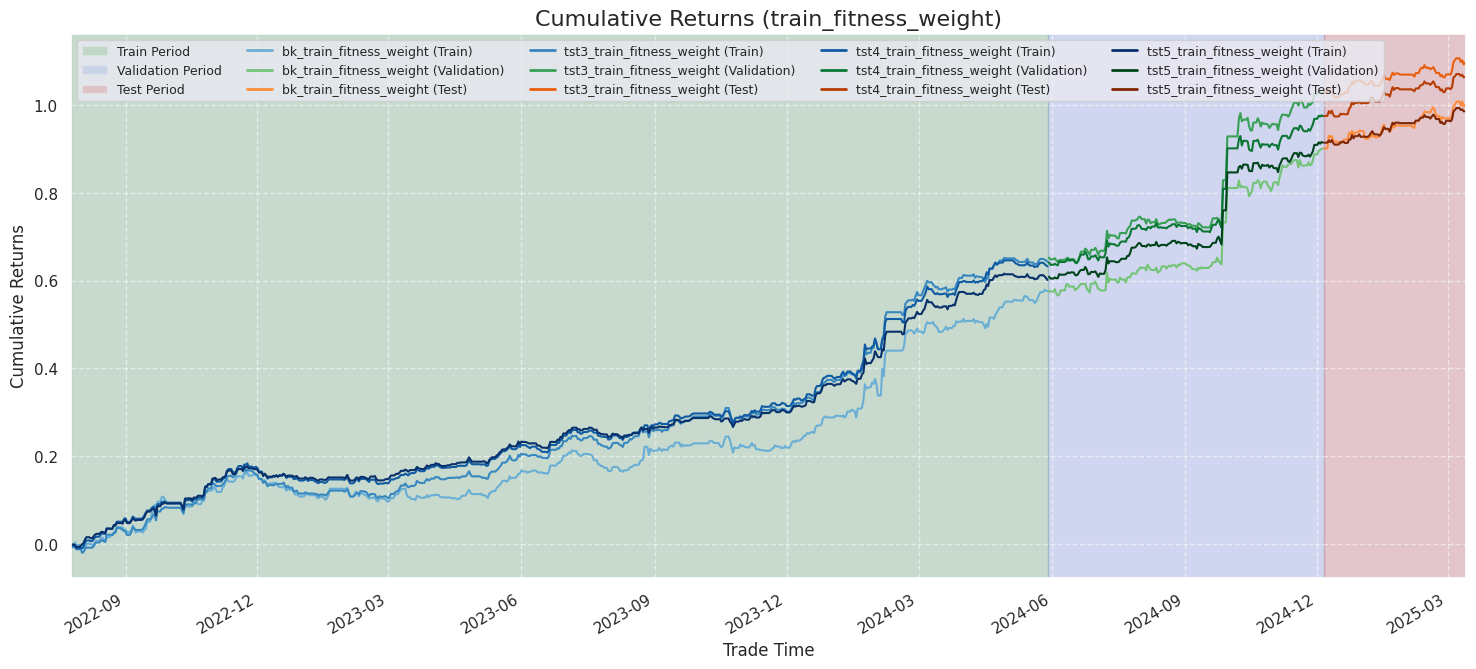

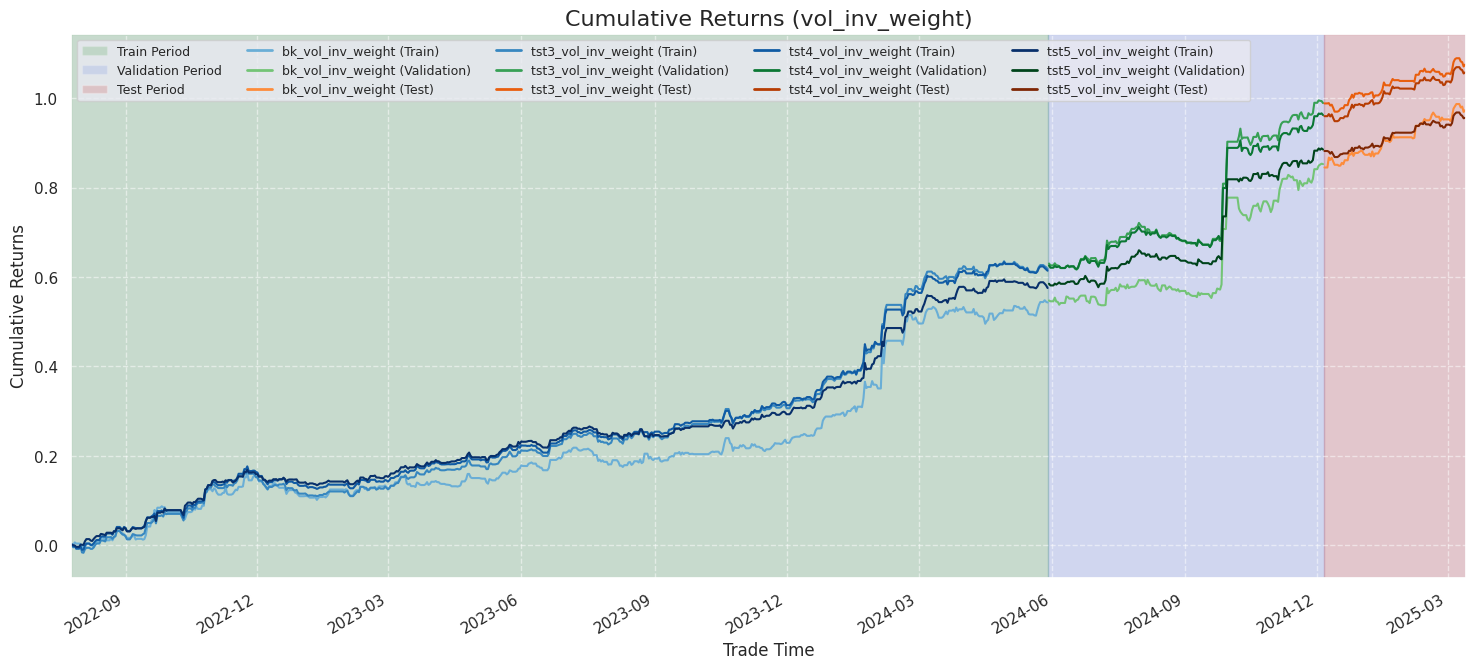

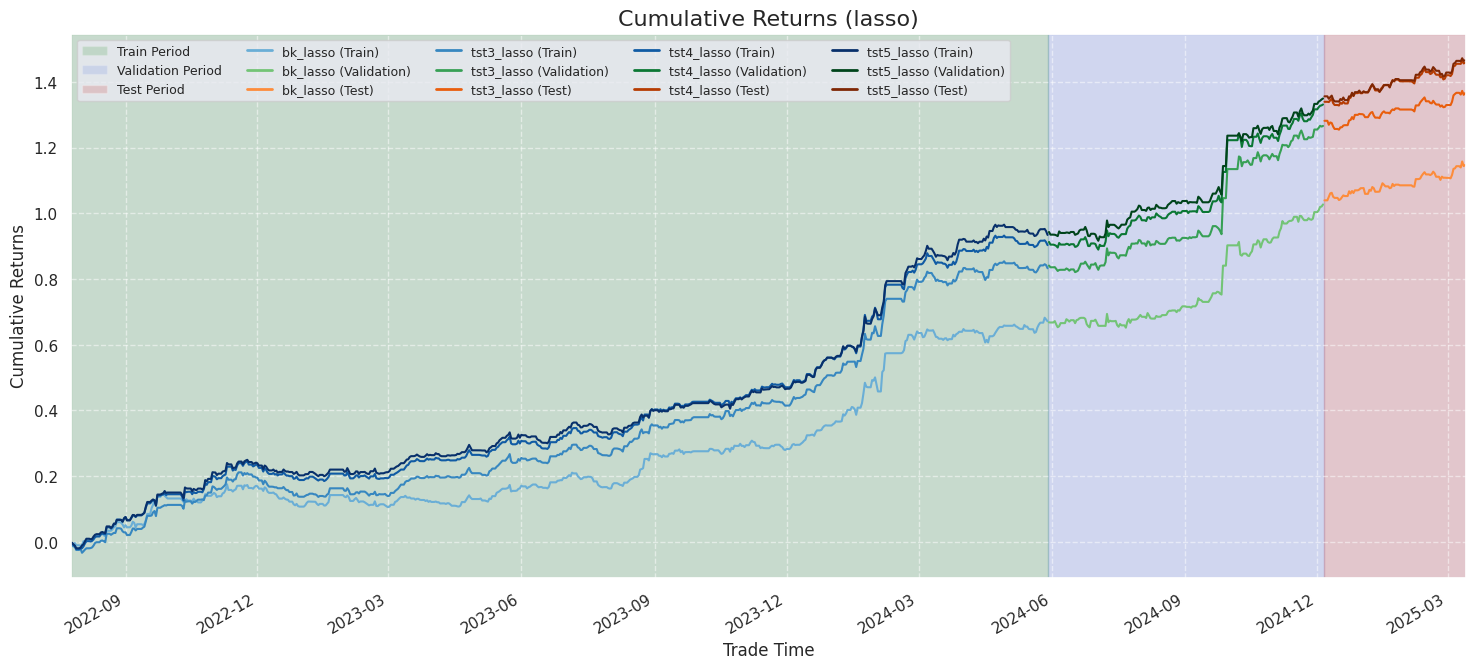

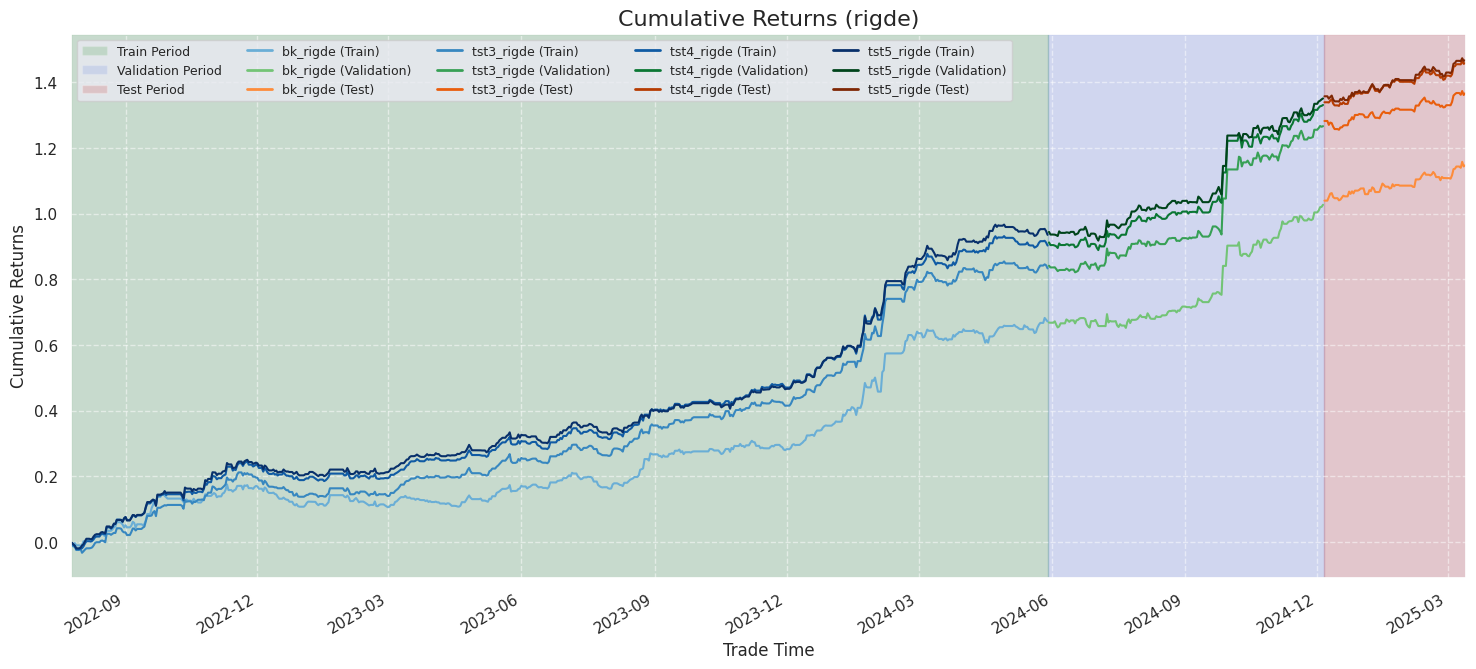

,name,train_sharpe,val_sharpe,test_sharpe
0,bk_equal_weight,2.271502,2.398436,2.635126
1,tst3_equal_weight,2.926947,2.538507,2.640561
2,tst4_equal_weight,3.126815,2.620968,3.183393
3,tst5_equal_weight,3.299189,2.639192,2.839784
0,bk_train_fitness_weight,2.253580,2.414604,2.387502
1,tst3_train_fitness_weight,2.961114,2.529248,2.349286
2,tst4_train_fitness_weight,3.168158,2.618280,2.939685
3,tst5_train_fitness_weight,3.318432,2.667269,2.697469
0,bk_vol_inv_weight,1.917765,2.067858,3.054582
1,tst3_vol_inv_weight,2.783640,2.388547,2.796269


In [16]:
category = ['equal_weight','train_fitness_weight','vol_inv_weight',
                                          'lasso','rigde']

r1 = []
for cty in category:
    select_returns = cumulative_returns.filter(regex='{0}$'.format(cty))
    plot_his_profit(cumulative_returns=select_returns.cumsum(), 
                time_periods=time_periods, name=cty)
    res = create_empyrical(cumulative_returns=select_returns,  types=['train','val','test'])
    r1.append(res)
pd.concat(r1,axis=0)

In [17]:
select_returns

,bk_rigde,tst3_rigde,tst4_rigde,tst5_rigde
trade_time,,,,
2022-07-25,-0.004064,-0.003268,-0.003003,-0.002432
2022-07-26,-0.002015,-0.004639,-0.000602,-0.000223
2022-07-27,-0.000985,-0.006180,-0.005922,-0.004713
2022-07-28,0.003332,0.000276,-0.003073,-0.004137
2022-07-29,-0.006998,-0.011017,-0.009410,-0.008255
...,...,...,...,...
2025-03-09,0.000000,0.000000,0.000000,0.000000
2025-03-10,-0.003782,-0.005397,-0.000393,-0.000932
2025-03-11,0.018158,0.011349,0.010912,0.008880
